In [57]:
import os
import pandas as pd
import numpy as np
import cv2

In [58]:
folder = "UTKFace"

files = os.listdir(folder)
print(files[0].split("_")[0])
print(files[0])

9
9_1_2_20161219204347420.jpg.chip.jpg


In [59]:
ages = []
genders = []
images = []
file_paths = []

for i, file in enumerate(files):
    age = int(file.split('_')[0])
    gender = int(file.split('_')[1])
    total = folder + '/' + file

    image = cv2.imread(total)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))

    images.append(image)
    ages.append(age)
    genders.append(gender)
    file_paths.append(total)

print(len(images))
print(len(genders))
print(len(ages))
print(ages[0])
print(genders[0])
print(file_paths[0])

df = pd.DataFrame(columns = ["Age", "Gender", "File Path"])
df["Age"] = ages
df["Gender"] = genders
df["File Path"] = file_paths
df

23708
23708
23708
9
1
UTKFace/9_1_2_20161219204347420.jpg.chip.jpg


,Age,Gender,File Path
0,9,1,UTKFace/9_1_2_20161219204347420.jpg.chip.jpg
1,36,0,UTKFace/36_0_1_20170117163203851.jpg.chip.jpg
2,86,1,UTKFace/86_1_0_20170120225751953.jpg.chip.jpg
3,26,1,UTKFace/26_1_0_20170116171048641.jpg.chip.jpg
4,1,1,UTKFace/1_1_2_20161219154612988.jpg.chip.jpg
...,...,...,...
23703,35,0,UTKFace/35_0_0_20170117155112202.jpg.chip.jpg
23704,52,0,UTKFace/52_0_3_20170119200211340.jpg.chip.jpg
23705,26,0,UTKFace/26_0_1_20170116010114628.jpg.chip.jpg
23706,28,0,UTKFace/28_0_1_20170117015458481.jpg.chip.jpg


In [60]:
images_np = np.array(images)
ages_np = np.array(ages)
genders_np = np.array(genders)

In [61]:
np.save('image.npy', images_np)
np.save('gender.npy',genders_np)
np.save('age.npy',ages_np)

In [62]:
values, counts = np.unique(genders_np, return_counts=True)
print(counts)

[12391 11317]


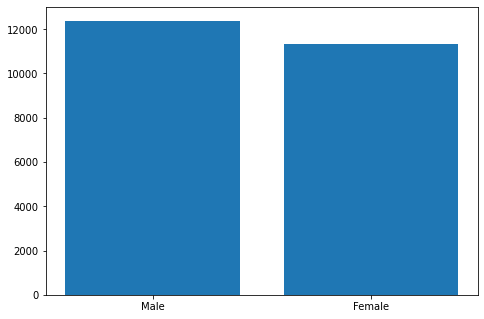

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[genders.count(0), genders.count(1)]
ax.bar(gender,values)
plt.show()

In [64]:
values, counts = np.unique(ages_np, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


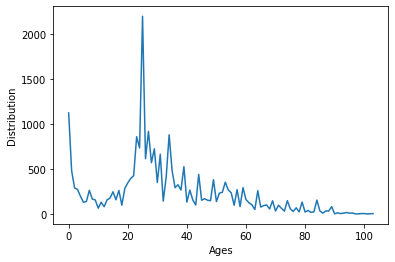

In [65]:
val=values.tolist()
cnt=counts.tolist()

plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [66]:
labels = []

i = 0
while i < len(ages):
  label = []
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i += 1

print(len(ages))

23708


In [67]:
images_np_2 = images_np / 255
labels_np = np.array(labels)
images_np_2.shape

(23708, 48, 48, 3)

In [68]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(images_np_2, labels_np, test_size = 0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18966, 48, 48, 3)
(4742, 48, 48, 3)
(18966, 2, 1)
(4742, 2, 1)


In [70]:
y_train[0:5]

array([[[56],
        [ 0]],

       [[26],
        [ 1]],

       [[25],
        [ 0]],

       [[36],
        [ 1]],

       [[ 1],
        [ 0]]])

In [71]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [72]:
y_train_2[0][0:5]

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [73]:
y_train_2[1][0:5]

array([[56],
       [26],
       [25],
       [36],
       [ 1]])

In [74]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [75]:
def Convolution(input_tensor,filters):
    x = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', kernel_regularizer = l2(0.01))(input_tensor)
    x = Dropout(0.2)(x)
    x = Activation('relu')(x)
    return x

def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1 = Convolution(inputs, 64)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1, 32)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2, 64)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3, 512)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten = Flatten() (maxp_4)
  dense_1 = Dense(64, activation = 'relu')(flatten)
  dense_2 = Dense(64, activation = 'relu')(flatten)
  drop_1 = Dropout(0.2)(dense_1)
  drop_2 = Dropout(0.2)(dense_2)
  output_1 = Dense(1, activation = "sigmoid", name = 'sex_out')(drop_1)
  output_2 = Dense(1, activation = "relu", name = 'age_out')(drop_2)
  model = Model(inputs = [inputs], outputs = [output_1, output_2])
  model.compile(loss = ["binary_crossentropy","mae"], optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4), metrics = ["accuracy"])
  
  return model

In [76]:
test_model = model((48, 48, 3))
test_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 48, 48, 32)   896         ['input_2[0][0]']                
                                                                                                  
 dropout_6 (Dropout)            (None, 48, 48, 32)   0           ['conv2d_4[0][0]']               
                                                                                                  
 activation_4 (Activation)      (None, 48, 48, 32)   0           ['dropout_6[0][0]']              
                                                                                            

In [77]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [78]:
fle_s='model_prediction.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=80, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [80]:
History = test_model.fit(x_train, y_train_2, batch_size = 64, validation_data = (x_test,y_test_2), epochs = 50, callbacks=[callback_list])

Epoch 1/50


2022-06-03 00:34:57.843665: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-03 00:34:58.262080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


297/297 [==============================] - ETA: 0s - loss: 20.9038 - sex_out_loss: 0.7617 - age_out_loss: 19.3009 - sex_out_accuracy: 0.5536 - age_out_accuracy: 0.0467

2022-06-03 00:35:07.098214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 23.69690, saving model to model_prediction.h5
297/297 [==============================] - 10s 32ms/step - loss: 20.9038 - sex_out_loss: 0.7617 - age_out_loss: 19.3009 - sex_out_accuracy: 0.5536 - age_out_accuracy: 0.0467 - val_loss: 23.6969 - val_sex_out_loss: 0.6664 - val_age_out_loss: 22.3120 - val_sex_out_accuracy: 0.5803 - val_age_out_accuracy: 0.0472
Epoch 2/50
296/297 [============================>.] - ETA: 0s - loss: 16.9945 - sex_out_loss: 0.6514 - age_out_loss: 15.6890 - sex_out_accuracy: 0.6164 - age_out_accuracy: 0.0475
Epoch 2: val_loss did not improve from 23.69690
297/297 [==============================] - 9s 29ms/step - loss: 16.9892 - sex_out_loss: 0.6513 - age_out_loss: 15.6838 - sex_out_accuracy: 0.6165 - age_out_accuracy: 0.0474 - val_loss: 24.8077 - val_sex_out_loss: 0.6577 - val_age_out_loss: 23.5441 - val_sex_out_accuracy: 0.6780 - val_age_out_accuracy: 0.0472
Epoch 3/50
295/297 [============================>.] - ETA: 0s - lo

In [81]:
from tensorflow.keras.models import load_model
Model = load_model('model_prediction.h5')

In [82]:
Model.evaluate(x_test, y_test_2)

  7/149 [>.............................] - ETA: 1s - loss: 18.9058 - sex_out_loss: 0.5083 - age_out_loss: 17.7011 - sex_out_accuracy: 0.7679 - age_out_accuracy: 0.0179     

2022-06-03 00:44:21.877585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


149/149 [==============================] - 1s 7ms/step - loss: 18.7362 - sex_out_loss: 0.4828 - age_out_loss: 17.5570 - sex_out_accuracy: 0.8161 - age_out_accuracy: 0.0278


[18.736221313476562,
 0.4828487038612366,
 17.557008743286133,
 0.8161113858222961,
 0.027836358174681664]

In [83]:
pred = Model.predict(x_test)
pred[1]

2022-06-03 00:44:32.828176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[21.611721 ],
       [17.117266 ],
       [25.513037 ],
       ...,
       [ 9.8303585],
       [20.077377 ],
       [26.173676 ]], dtype=float32)

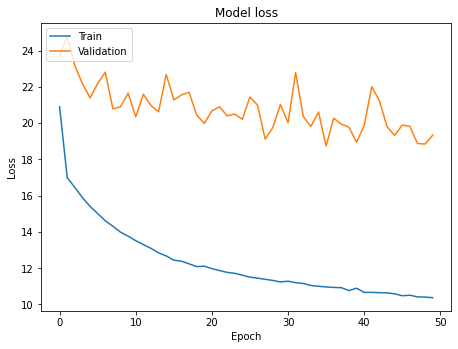

In [84]:
import matplotlib.pyplot as plt 

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplots_adjust(top = 1.00, bottom = 0.0, left = 0.0, right = 0.95, hspace = 0.25, wspace = 0.35)

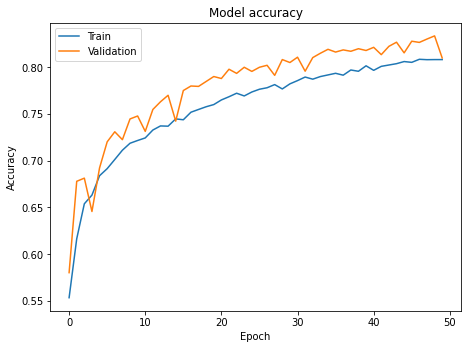

In [85]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplots_adjust(top = 1.00, bottom = 0.0, left = 0.0, right = 0.95, hspace = 0.25, wspace = 0.35)

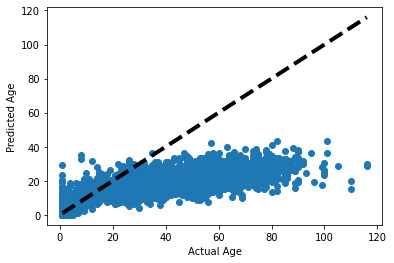

In [89]:
fig, ax = plt.subplots()
ax.scatter(y_test_2[1], pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()], [y_test_2[1].min(), y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()